In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from scipy import stats
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



orders = pd.read_csv("/data/notebook_files/olist_orders_dataset.csv")
payments = pd.read_csv("/data/notebook_files/olist_order_payments_dataset.csv")
customers = pd.read_csv("/data/notebook_files/olist_customers_dataset.csv")
products = pd.read_csv("/data/notebook_files/olist_products_dataset.csv")
items = pd.read_csv("/data/notebook_files/olist_order_items_dataset.csv")
reviews = pd.read_csv("/data/notebook_files/olist_order_reviews_dataset.csv")
geolocation = pd.read_csv("/data/notebook_files/olist_geolocation_dataset.csv")
translations = pd.read_csv("/data/notebook_files/product_category_name_translation.csv")
sellers = pd.read_csv("/data/notebook_files/olist_sellers_dataset.csv")

In [2]:
merged_data = pd.merge(orders, 
                       items,  
                       on='order_id', how='right')

merged_data = pd.merge(merged_data, 
                       reviews,  
                       on='order_id', how='right')

merged_data = pd.merge(merged_data, 
                       payments,  
                       on='order_id', how='right')

merged_data = pd.merge(merged_data, 
                       customers,  
                       on='customer_id', how='right')

merged_data = pd.merge(merged_data, 
                       products,  
                       on='product_id', how='right')

merged_data = pd.merge(merged_data, 
                       sellers,  
                       on='seller_id', how='right')
merged_data = pd.merge(merged_data, 
                       translations,  
                       on='product_category_name', how='right')

merged_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,9045fa841de3514ce900f5fc869d9b1f,2f8d6af8cb3875d6964eb4b5eff3a718,delivered,2017-11-21 22:34:18,2017-11-21 22:48:20,2017-11-22 20:28:57,2017-11-24 20:26:51,2017-12-13 00:00:00,1.0,0a37e05528984f47c754837344732fbb,...,3897.0,2.0,800.0,40.0,20.0,30.0,80310,curitiba,PR,health_beauty
1,404c087c1f661898fcfe9d4c4b1480d7,1ce70910bc16481433b771949f74552c,delivered,2017-02-24 22:55:52,2017-02-24 23:05:16,2017-03-07 15:02:21,2017-03-13 11:04:15,2017-03-28 00:00:00,1.0,67473aa97e981b3b8abaa6a8a768eb26,...,450.0,1.0,400.0,38.0,12.0,25.0,80310,curitiba,PR,health_beauty
2,d6d7c431275f0029dcc3538850930046,5b477d525dd0c1eb93148e22ce5d3ba6,delivered,2017-01-19 14:28:48,2017-01-19 14:41:56,2017-01-24 10:05:23,2017-01-31 12:26:08,2017-03-13 00:00:00,1.0,67473aa97e981b3b8abaa6a8a768eb26,...,450.0,1.0,400.0,38.0,12.0,25.0,80310,curitiba,PR,health_beauty
3,c0e02613bf15378f18d3498361a76c9d,c2f181778a12039532d79460d4ba59e2,delivered,2018-06-01 22:22:52,2018-06-05 04:51:55,2018-06-06 15:47:00,2018-06-22 18:31:59,2018-07-26 00:00:00,1.0,b60a0c8bd0333c69ee70565973709bbf,...,2010.0,5.0,650.0,16.0,10.0,11.0,80310,curitiba,PR,health_beauty
4,1bf38e3450f15beeafbebe6e0665d612,21a9772e10934cf4598522d6ec827697,delivered,2018-06-15 20:36:23,2018-06-15 21:01:16,2018-06-18 16:01:00,2018-06-22 18:57:34,2018-07-18 00:00:00,1.0,08462528607b71ea62cbc019d91b001e,...,591.0,2.0,650.0,16.0,10.0,11.0,80310,curitiba,PR,health_beauty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,cab08f0417a702d0f4782ec02356a4ac,f4b4417d306cbf8c55ea65c89d0261f7,delivered,2017-09-30 18:54:53,2017-10-03 04:28:12,2017-10-03 18:54:12,2017-10-30 12:37:42,2017-11-01 00:00:00,1.0,8cfc3506cedc0626364457d254429118,...,327.0,3.0,300.0,30.0,20.0,20.0,3929,sao paulo,SP,fashion_childrens_clothes
115605,cb53f0b6e8f9082a9f5a113765dd1236,035c08a68b237ef4afc82109e61a7380,delivered,2018-06-03 22:34:58,2018-06-03 22:50:09,2018-06-04 15:15:00,2018-06-05 21:52:02,2018-06-28 00:00:00,1.0,8cfc3506cedc0626364457d254429118,...,327.0,3.0,300.0,30.0,20.0,20.0,3929,sao paulo,SP,fashion_childrens_clothes
115606,3be3bae6f665380f803dc59c9053cf26,03eaeeab9883ef63043d7f0e0325a370,processing,2017-08-06 14:18:45,2017-08-08 04:10:13,NaN,NaN,2017-08-31 00:00:00,1.0,2b18330ce86ae5c606250b75b499f370,...,277.0,3.0,120.0,19.0,11.0,15.0,20551,rio de janeiro,RJ,fashion_childrens_clothes
115607,bede3503afed051733eeb4a84d1adcc5,919570a26efbd068d6a0f66d5c5072a3,delivered,2017-09-17 16:51:43,2017-09-19 04:05:52,2017-09-19 20:22:49,2017-09-28 18:14:35,2017-10-11 00:00:00,1.0,8db75af9aed3315374db44d7860e25da,...,461.0,4.0,400.0,26.0,22.0,11.0,12327,jacarei,SP,security_and_services


In [3]:
# 转换时间戳为 datetime 类型
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# 计算 R 值（Recency）
latest_order_time = merged_data['order_purchase_timestamp'].max()
merged_data['recency'] = (latest_order_time - merged_data['order_purchase_timestamp']).dt.days
recency = merged_data.groupby('customer_unique_id')['recency'].min().reset_index()


# 计算 F 值（Frequency）
frequency = merged_data.groupby('customer_unique_id').size().reset_index(name='frequency')

# 计算 M 值（Monetary）
monetary = merged_data.groupby('customer_unique_id')['payment_value'].sum().reset_index(name='monetary')

# 合并 R、F、M 值
rfm = pd.merge(recency, frequency, on='customer_unique_id')
rfm = pd.merge(rfm, monetary, on='customer_unique_id')

rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
2,0000f46a3911fa3c0805444483337064,541,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89
...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,451,2,4134.84
93392,fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58
93393,ffff371b4d645b6ecea244b27531430a,572,1,112.46
93394,ffff5962728ec6157033ef9805bacc48,123,1,133.69


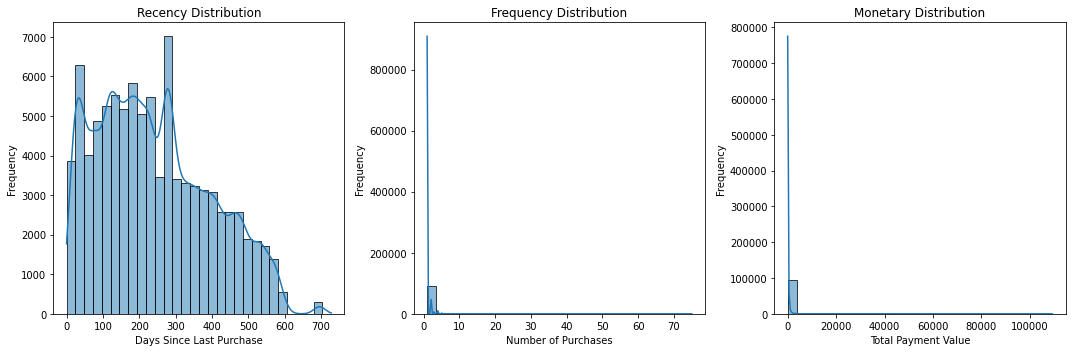

In [4]:
# 绘制 R、F、M 值的分布图
plt.figure(figsize=(15, 5))

# R 值分布图
plt.subplot(1, 3, 1)
sns.histplot(rfm['recency'], bins=30, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')

# F 值分布图
plt.subplot(1, 3, 2)
sns.histplot(rfm['frequency'], bins=30, kde=True)
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')

# M 值分布图
plt.subplot(1, 3, 3)
sns.histplot(rfm['monetary'], bins=30, kde=True)
plt.title('Monetary Distribution')
plt.xlabel('Total Payment Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [5]:
# 按中位数划分
median_recency = rfm['recency'].median()
median_frequency = rfm['frequency'].median()
median_monetary = rfm['monetary'].median()

# 按CI上限划分
ci_upper_recency = rfm['recency'].quantile(0.75) + 1.5 * (rfm['recency'].quantile(0.75) - rfm['recency'].quantile(0.25))
ci_upper_frequency = rfm['frequency'].quantile(0.75) + 1.5 * (rfm['frequency'].quantile(0.75) - rfm['frequency'].quantile(0.25))
ci_upper_monetary = rfm['monetary'].quantile(0.75) + 1.5 * (rfm['monetary'].quantile(0.75) - rfm['monetary'].quantile(0.25))

# 按四分位点划分
q1_recency = rfm['recency'].quantile(0.25)
q1_frequency = rfm['frequency'].quantile(0.25)
q1_monetary = rfm['monetary'].quantile(0.25)

# 按平均数划分
mean_recency = rfm['recency'].mean()
mean_frequency = rfm['frequency'].mean()
mean_monetary = rfm['monetary'].mean()

# 计算 R、F、M 值的评分
rfm['R_score_by_mean'] = rfm['recency'].apply(lambda x: 1 if x <= mean_recency else 0)
rfm['F_score_by_mean'] = rfm['frequency'].apply(lambda x: 1 if x > mean_frequency else 0)
rfm['M_score_by_mean'] = rfm['monetary'].apply(lambda x: 1 if x > mean_monetary else 0)

rfm['R_score_by_CI'] = rfm['recency'].apply(lambda x: 1 if x <= ci_upper_recency else 0)
rfm['F_score_by_CI'] = rfm['frequency'].apply(lambda x: 1 if x > ci_upper_frequency else 0)
rfm['M_score_by_CI'] = rfm['monetary'].apply(lambda x: 1 if x > ci_upper_monetary else 0)

rfm['R_score_by_mid'] = rfm['recency'].apply(lambda x: 1 if x <= median_recency else 0)
rfm['F_score_by_mid'] = rfm['frequency'].apply(lambda x: 1 if x > median_frequency else 0)
rfm['M_score_by_mid'] = rfm['monetary'].apply(lambda x: 1 if x > median_monetary else 0)

rfm['R_score_by_q1'] = rfm['recency'].apply(lambda x: 1 if x <= q1_recency else 0)
rfm['F_score_by_q1'] = rfm['frequency'].apply(lambda x: 1 if x > q1_frequency else 0)
rfm['M_score_by_q1'] = rfm['monetary'].apply(lambda x: 1 if x > q1_monetary else 0)

# 合并 R、F、M 评分
rfm['RFM_score_by_mean'] = rfm['R_score_by_mean'].astype(str) + rfm['F_score_by_mean'].astype(str) + rfm['M_score_by_mean'].astype(str)
rfm['RFM_score_by_CI'] = rfm['R_score_by_CI'].astype(str) + rfm['F_score_by_CI'].astype(str) + rfm['M_score_by_CI'].astype(str)
rfm['RFM_score_by_mid'] = rfm['R_score_by_mid'].astype(str) + rfm['F_score_by_mid'].astype(str) + rfm['M_score_by_mid'].astype(str)
rfm['RFM_score_by_q1'] = rfm['R_score_by_q1'].astype(str) + rfm['F_score_by_q1'].astype(str) + rfm['M_score_by_q1'].astype(str)


# 按照 RFM 评分划分用户类型
def rfm_segmentation(df, column):
    if df[column] == '111': return 'High Value Customer'
    elif df[column] == '101': return 'Potential Customer'
    elif df[column] == '011': return 'Loyal Customer'
    elif df[column] == '001': return 'At Risk Customer'
    elif df[column] == '110': return 'Average Value Customer'
    elif df[column] == '100': return 'Average Potential Customer'
    elif df[column] == '010': return 'Average Loyal Customer'
    elif df[column] == '000': return 'Average At Risk Customer'
    else: print(df[column])


rfm['customer_type_by_mean'] = rfm.apply(rfm_segmentation, args=('RFM_score_by_mean',), axis=1)
rfm['customer_type_by_CI'] = rfm.apply(rfm_segmentation, args=('RFM_score_by_CI',), axis=1)
rfm['customer_type_by_q1'] = rfm.apply(rfm_segmentation, args=('RFM_score_by_q1',), axis=1)
rfm['customer_type_by_mid'] = rfm.apply(rfm_segmentation, args=('RFM_score_by_mid',), axis=1)

# 查看结果
rfm

,customer_unique_id,recency,frequency,monetary,R_score_by_mean,F_score_by_mean,M_score_by_mean,R_score_by_CI,F_score_by_CI,M_score_by_CI,...,F_score_by_q1,M_score_by_q1,RFM_score_by_mean,RFM_score_by_CI,RFM_score_by_mid,RFM_score_by_q1,customer_type_by_mean,customer_type_by_CI,customer_type_by_q1,customer_type_by_mid
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,1,0,0,1,0,0,...,0,1,100,100,101,101,Average Potential Customer,Average Potential Customer,Potential Customer,Potential Customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,1,0,0,1,0,0,...,0,0,100,100,100,100,Average Potential Customer,Average Potential Customer,Average Potential Customer,Average Potential Customer
2,0000f46a3911fa3c0805444483337064,541,1,86.22,0,0,0,1,0,0,...,0,1,000,100,000,001,Average At Risk Customer,Average Potential Customer,At Risk Customer,Average At Risk Customer
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,0,0,0,1,0,0,...,0,0,000,100,000,000,Average At Risk Customer,Average Potential Customer,Average At Risk Customer,Average At Risk Customer
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,0,0,0,1,0,0,...,0,1,000,100,001,001,Average At Risk Customer,Average Potential Customer,At Risk Customer,At Risk Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,451,2,4134.84,0,1,1,1,1,1,...,1,1,011,111,011,011,Loyal Customer,High Value Customer,Loyal Customer,Loyal Customer
93392,fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58,0,0,0,1,0,0,...,0,1,000,100,000,001,Average At Risk Customer,Average Potential Customer,At Risk Customer,Average At Risk Customer
93393,ffff371b4d645b6ecea244b27531430a,572,1,112.46,0,0,0,1,0,0,...,0,1,000,100,000,001,Average At Risk Customer,Average Potential Customer,At Risk Customer,Average At Risk Customer
93394,ffff5962728ec6157033ef9805bacc48,123,1,133.69,1,0,0,1,0,0,...,0,1,100,100,101,001,Average Potential Customer,Average Potential Customer,At Risk Customer,Potential Customer


In [6]:
# 统计每种类型用户的数量和占比
customer_type_counts = rfm[['customer_type_by_mean', 'customer_type_by_CI', 'customer_type_by_q1', 'customer_type_by_mid']].value_counts().reset_index(name='count')

# 分别计算每种客户类型在不同划分标准下的数量
customer_type_counts_mean = customer_type_counts.groupby('customer_type_by_mean')['count'].sum().reset_index(name='count_by_mean')
customer_type_counts_mid = customer_type_counts.groupby('customer_type_by_mid')['count'].sum().reset_index(name='count_by_mid')
customer_type_counts_q1 = customer_type_counts.groupby('customer_type_by_q1')['count'].sum().reset_index(name='count_by_q1')
customer_type_counts_CI = customer_type_counts.groupby('customer_type_by_CI')['count'].sum().reset_index(name='count_by_CI')

# 定义八种类别
categories = [
    'High Value Customer', 'Potential Customer', 'Loyal Customer', 'At Risk Customer',
    'Average Value Customer', 'Average Potential Customer', 'Average Loyal Customer', 'Average At Risk Customer'
]

# 创建一个空的 DataFrame 用于存放合并结果
customer_type_counts = pd.DataFrame(categories, columns=['customer_type'])

# 合并四张表
customer_type_counts = customer_type_counts.merge(customer_type_counts_mean, left_on='customer_type', right_on='customer_type_by_mean', how='left').drop(columns='customer_type_by_mean')
customer_type_counts = customer_type_counts.merge(customer_type_counts_mid, left_on='customer_type', right_on='customer_type_by_mid', how='left').drop(columns='customer_type_by_mid')
customer_type_counts = customer_type_counts.merge(customer_type_counts_q1, left_on='customer_type', right_on='customer_type_by_q1', how='left').drop(columns='customer_type_by_q1')
customer_type_counts = customer_type_counts.merge(customer_type_counts_CI, left_on='customer_type', right_on='customer_type_by_CI', how='left').drop(columns='customer_type_by_CI')

# 将 NaN 值替换为 0
customer_type_counts.fillna(0, inplace=True)

# 打印结果
customer_type_counts

,customer_type,count_by_mean,count_by_mid,count_by_q1,count_by_CI
0,High Value Customer,5040,6023,3326,5029.0
1,Potential Customer,6929,17703,14445,4126.0
2,Loyal Customer,3990,5912,9907,0.0
3,At Risk Customer,5966,17059,42294,0.0
4,Average Value Customer,2590,958,168,8989.0
5,Average Potential Customer,36579,22082,5683,75250.0
6,Average Loyal Customer,2399,1126,618,1.0
7,Average At Risk Customer,29903,22533,16955,1.0


Chi2 Statistic: 208475.5531490239
P-Value: 0.0
Degrees of Freedom: 21


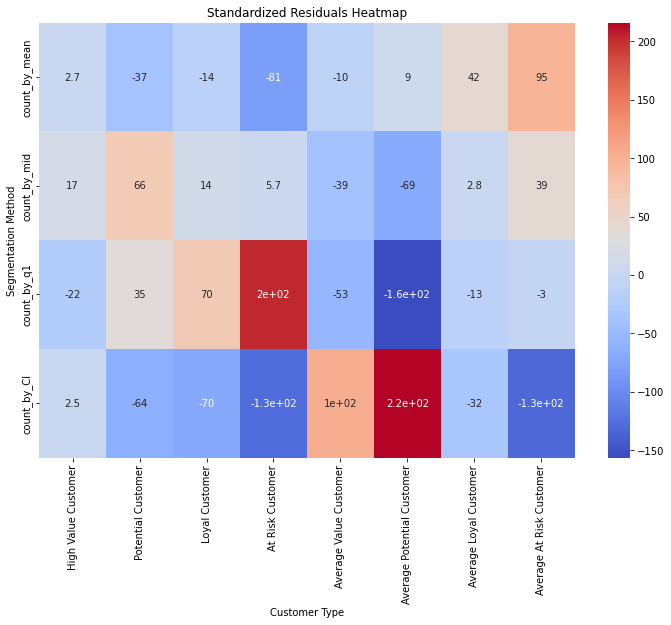

In [7]:
# 创建列联表
contingency_table = customer_type_counts.set_index('customer_type').T

# 进行卡方检验
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 打印结果
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")

# 计算标准平方差
observed = contingency_table.values
standardized_residuals = (observed - expected) / np.sqrt(expected)

# 创建热图
plt.figure(figsize=(12, 8))
sns.heatmap(standardized_residuals, annot=True, cmap='coolwarm', xticklabels=customer_type_counts['customer_type'], yticklabels=contingency_table.index)
plt.title('Standardized Residuals Heatmap')
plt.xlabel('Customer Type')
plt.ylabel('Segmentation Method')
plt.show()

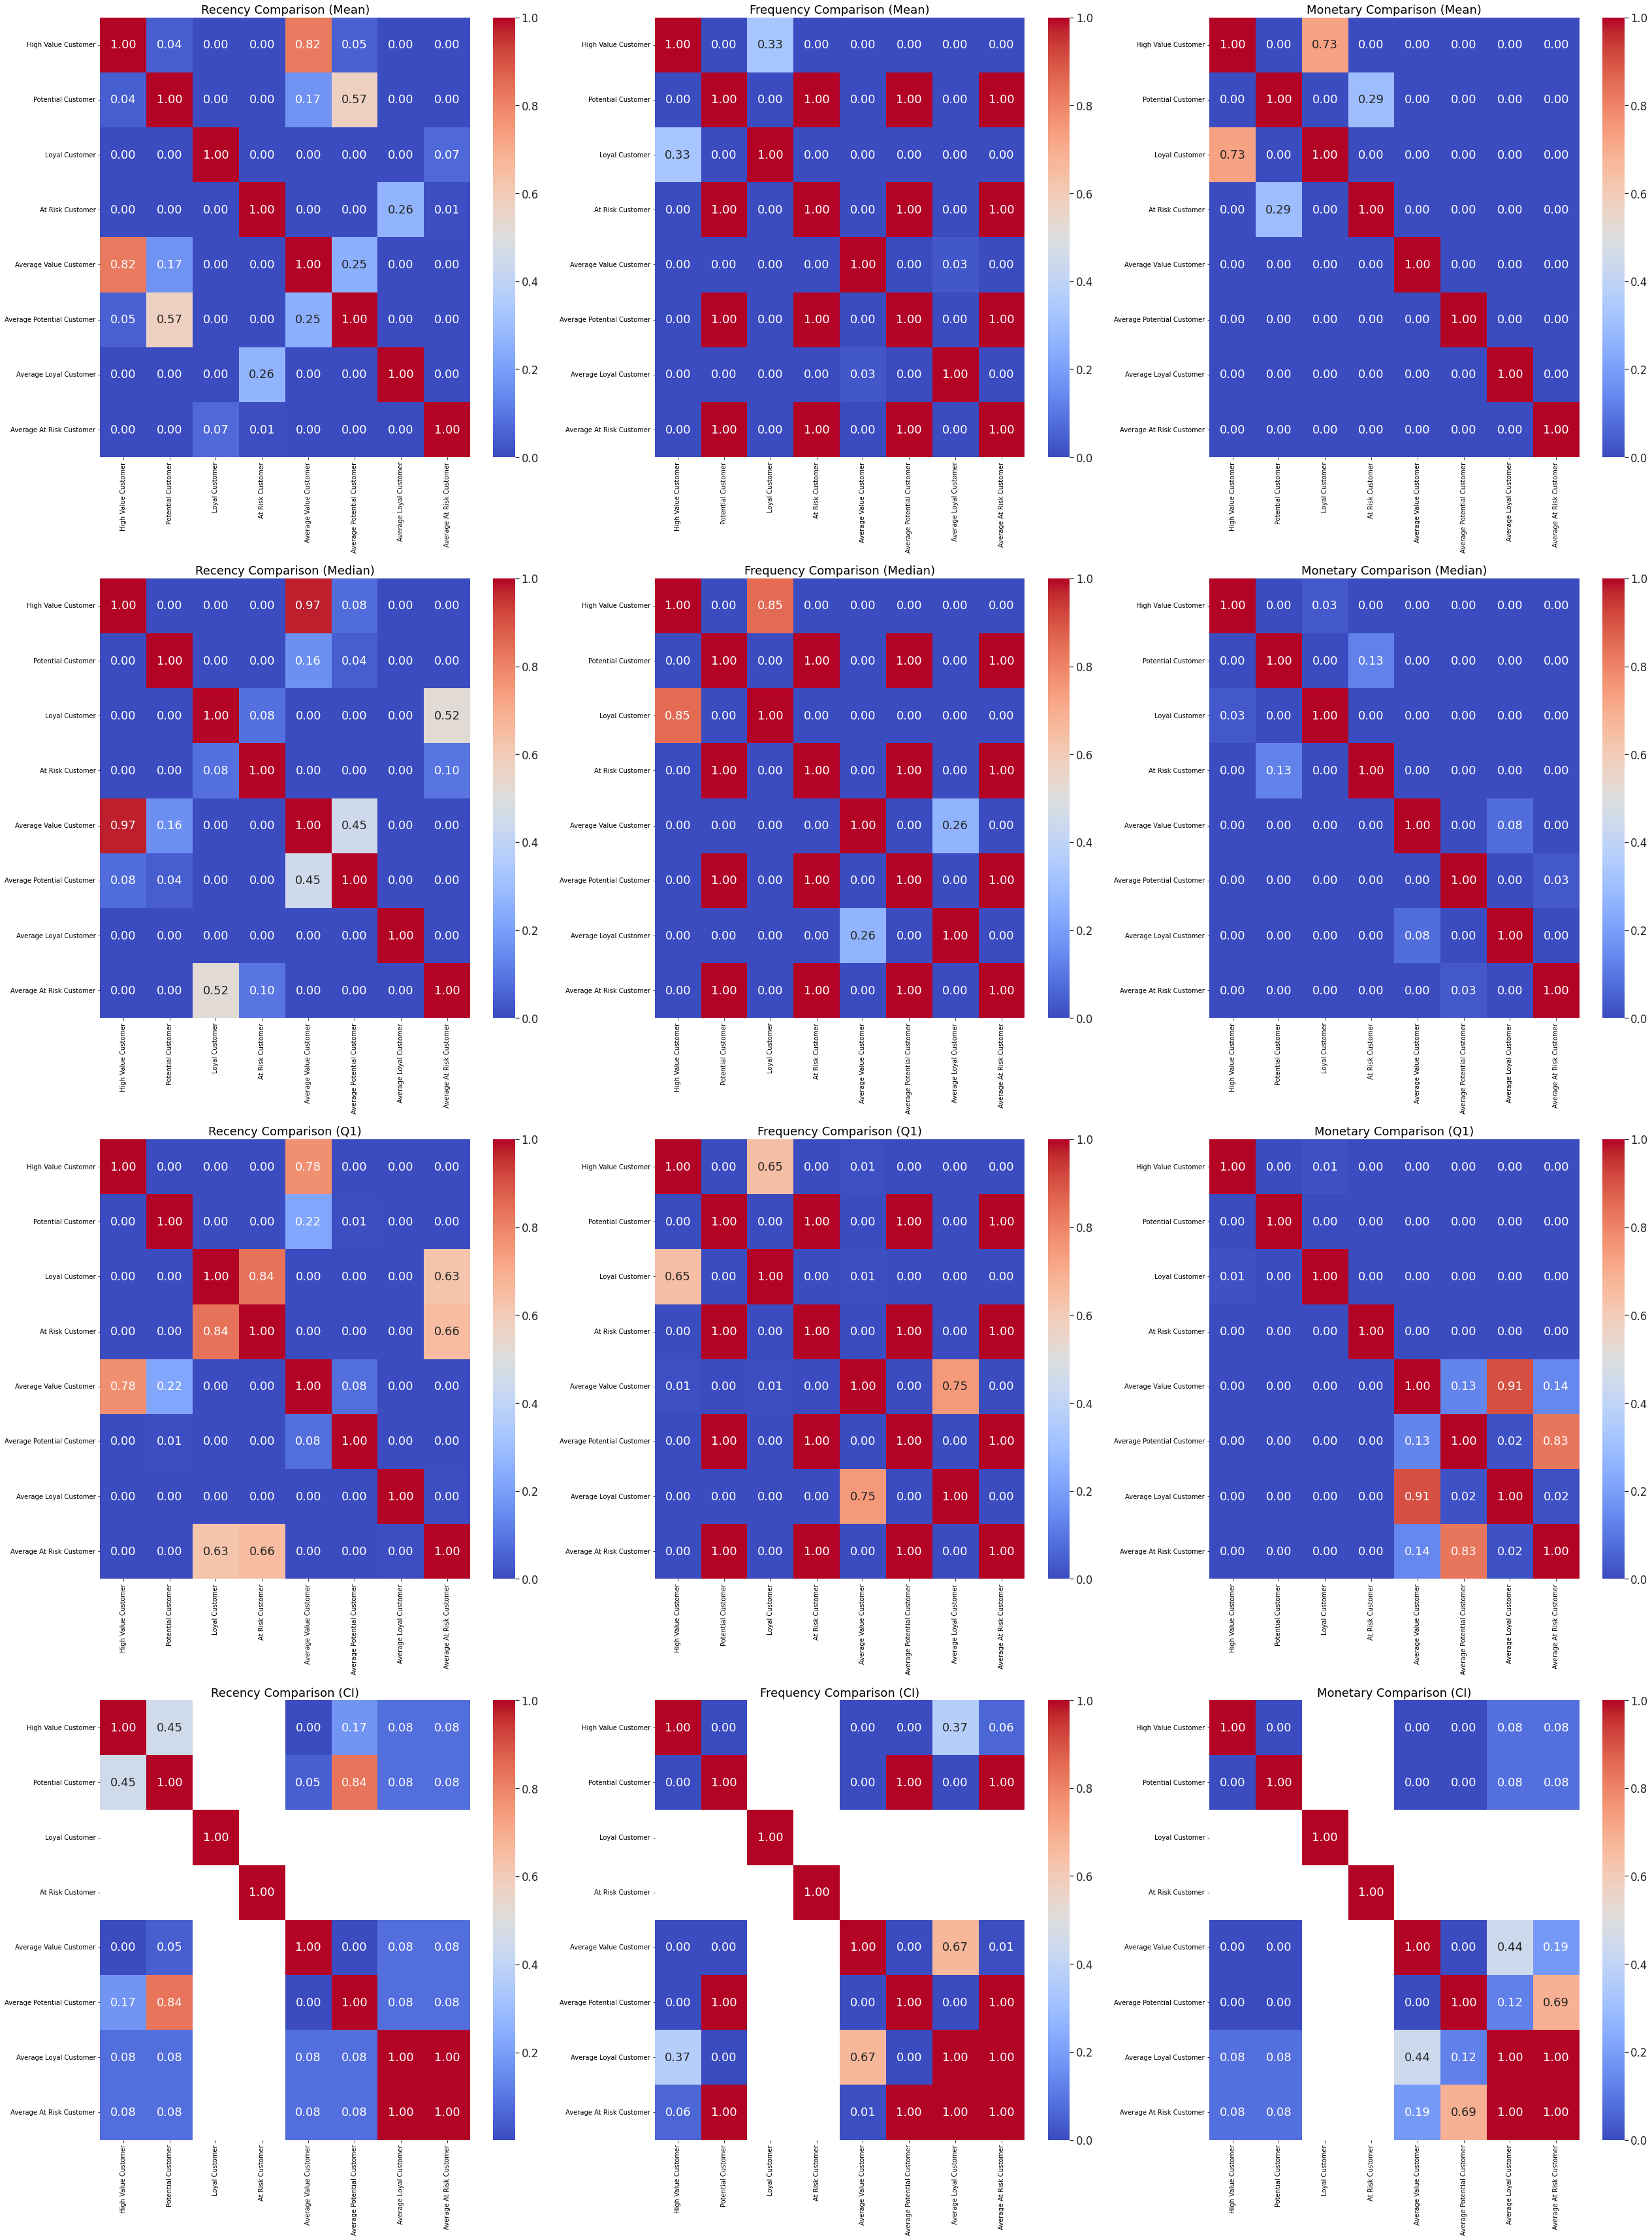

In [8]:
# 获取所有用户类型
user_types = categories

# 初始化数据框
monetary_matrix_mean = pd.DataFrame(index=user_types, columns=user_types)
recency_matrix_mean = pd.DataFrame(index=user_types, columns=user_types)
frequency_matrix_mean = pd.DataFrame(index=user_types, columns=user_types)

monetary_matrix_mid = pd.DataFrame(index=user_types, columns=user_types)
recency_matrix_mid = pd.DataFrame(index=user_types, columns=user_types)
frequency_matrix_mid = pd.DataFrame(index=user_types, columns=user_types)

monetary_matrix_q1 = pd.DataFrame(index=user_types, columns=user_types)
recency_matrix_q1 = pd.DataFrame(index=user_types, columns=user_types)
frequency_matrix_q1 = pd.DataFrame(index=user_types, columns=user_types)

monetary_matrix_CI = pd.DataFrame(index=user_types, columns=user_types)
recency_matrix_CI = pd.DataFrame(index=user_types, columns=user_types)
frequency_matrix_CI = pd.DataFrame(index=user_types, columns=user_types)

def calculate_matrices(df, rfm_type, matrix_dict):
    for type1, type2 in combinations(user_types, 2):
        group1 = df[df['customer_type'] == type1][rfm_type]
        group2 = df[df['customer_type'] == type2][rfm_type]
        
        # 检查样本大小是否为0
        if len(group1) == 0 or len(group2) == 0:
            continue
        
        # 进行 Mann-Whitney U 检验
        stat, p = stats.mannwhitneyu(group1, group2)
        
        matrix_dict[type1][type2] = p
        matrix_dict[type2][type1] = p

    for type0 in user_types:
        matrix_dict[type0][type0] = 1

# 计算所有矩阵
rfm_types = ['recency', 'frequency', 'monetary']
for rfm_type in rfm_types:
    calculate_matrices(rfm[['customer_type_by_mean', rfm_type]].rename(columns={'customer_type_by_mean': 'customer_type'}), rfm_type, 
                       eval(f"{rfm_type}_matrix_mean"))
    calculate_matrices(rfm[['customer_type_by_mid', rfm_type]].rename(columns={'customer_type_by_mid': 'customer_type'}), rfm_type, 
                       eval(f"{rfm_type}_matrix_mid"))
    calculate_matrices(rfm[['customer_type_by_q1', rfm_type]].rename(columns={'customer_type_by_q1': 'customer_type'}), rfm_type, 
                       eval(f"{rfm_type}_matrix_q1"))
    calculate_matrices(rfm[['customer_type_by_CI', rfm_type]].rename(columns={'customer_type_by_CI': 'customer_type'}), rfm_type, 
                       eval(f"{rfm_type}_matrix_CI"))

# 绘制热图
fig, axes = plt.subplots(4, 3, figsize=(36, 48))
sns.set(font_scale=1.5)

# Mean
sns.heatmap(recency_matrix_mean.astype(float), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title('Recency Comparison (Mean)')
sns.heatmap(frequency_matrix_mean.astype(float), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", ax=axes[0, 1])
axes[0, 1].set_title('Frequency Comparison (Mean)')
sns.heatmap(monetary_matrix_mean.astype(float), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", ax=axes[0, 2])
axes[0, 2].set_title('Monetary Comparison (Mean)')

# Median
sns.heatmap(recency_matrix_mid.astype(float), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title('Recency Comparison (Median)')
sns.heatmap(frequency_matrix_mid.astype(float), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('Frequency Comparison (Median)')
sns.heatmap(monetary_matrix_mid.astype(float), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", ax=axes[1, 2])
axes[1, 2].set_title('Monetary Comparison (Median)')

# Q1
sns.heatmap(recency_matrix_q1.astype(float), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", ax=axes[2, 0])
axes[2, 0].set_title('Recency Comparison (Q1)')
sns.heatmap(frequency_matrix_q1.astype(float), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", ax=axes[2, 1])
axes[2, 1].set_title('Frequency Comparison (Q1)')
sns.heatmap(monetary_matrix_q1.astype(float), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", ax=axes[2, 2])
axes[2, 2].set_title('Monetary Comparison (Q1)')

# CI
sns.heatmap(recency_matrix_CI.astype(float), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", ax=axes[3, 0])
axes[3, 0].set_title('Recency Comparison (CI)')
sns.heatmap(frequency_matrix_CI.astype(float), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", ax=axes[3, 1])
axes[3, 1].set_title('Frequency Comparison (CI)')
sns.heatmap(monetary_matrix_CI.astype(float), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", ax=axes[3, 2])
axes[3, 2].set_title('Monetary Comparison (CI)')

plt.tight_layout()
plt.show()

{'mean': 112, 'mid': 110, 'q1': 108, 'ci': 10}
Mean has 112 significant differences.
Mid has 110 significant differences.
Q1 has 108 significant differences.
Ci has 10 significant differences.


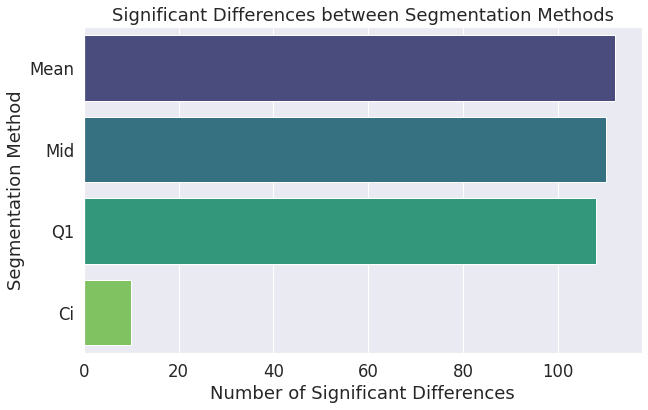

In [9]:
# 将结果存入字典中以便后续计算
p_matrices = {
    'mean': {'recency': recency_matrix_mean, 'frequency': frequency_matrix_mean, 'monetary': monetary_matrix_mean},
    'mid': {'recency': recency_matrix_mid, 'frequency': frequency_matrix_mid, 'monetary': monetary_matrix_mid},
    'q1': {'recency': recency_matrix_q1, 'frequency': frequency_matrix_q1, 'monetary': monetary_matrix_q1},
    'ci': {'recency': recency_matrix_CI, 'frequency': frequency_matrix_CI, 'monetary': monetary_matrix_CI}
}

significance_threshold = 0.05

def count_significant_differences(p_matrix_dict, threshold):
    significant_counts = {}
    for method, matrices in p_matrix_dict.items():
        total_significant = 0
        for metric, matrix in matrices.items():
            significant = (matrix.astype(float) < threshold).sum().sum() - len(categories)
            total_significant += significant
        significant_counts[method] = total_significant
    return significant_counts

significant_counts = count_significant_differences(p_matrices, significance_threshold)

# 查看结果
print(significant_counts)

# 排序结果
sorted_methods = sorted(significant_counts.items(), key=lambda x: x[1], reverse=True)

# 打印排序结果
for method, count in sorted_methods:
    print(f"{method.capitalize()} has {count} significant differences.")

plt.figure(figsize=(10, 6))
methods = [method.capitalize() for method, _ in sorted_methods]
counts = [count for _, count in sorted_methods]
sns.barplot(x=counts, y=methods, palette='viridis')
plt.xlabel('Number of Significant Differences')
plt.ylabel('Segmentation Method')
plt.title('Significant Differences between Segmentation Methods')
plt.show()

In [10]:
customer_product_type = merged_data.pivot_table(index='customer_unique_id', 
                                                columns='product_category_name_english', 
                                                aggfunc='size', 
                                                fill_value=0).reset_index()
customer_product_type = rfm.merge(customer_product_type, on=['customer_unique_id']).groupby(['customer_type_by_mean']).sum().reset_index()
customer_product_type = customer_product_type.drop(customer_product_type.columns[1:16], axis=1)
customer_product_type

<ipython-input-10-d3592f674f93>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_product_type = rfm.merge(customer_product_type, on=['customer_unique_id']).groupby(['customer_type_by_mean']).sum().reset_index()


,customer_type_by_mean,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,At Risk Customer,24,28,3,0,17,221,168,366,3,...,0,2,98,1,392,70,0,169,316,657
1,Average At Risk Customer,15,59,25,0,121,1009,880,2950,194,...,2,24,170,3,2521,743,49,1570,1835,1192
2,Average Loyal Customer,6,4,11,1,20,129,120,746,23,...,0,3,14,0,472,79,8,351,176,177
3,Average Potential Customer,47,81,149,13,122,1755,1173,3335,220,...,0,61,179,24,2825,1061,14,1691,1013,2176
4,Average Value Customer,21,11,10,7,18,195,192,680,40,...,0,13,35,0,427,208,1,319,143,207
5,High Value Customer,50,41,9,1,21,375,258,1900,34,...,0,73,58,6,982,208,7,221,231,593
6,Loyal Customer,19,51,8,0,16,296,157,1591,21,...,0,11,53,0,861,153,6,198,342,303
7,Potential Customer,70,22,2,2,42,376,230,279,26,...,0,12,92,44,462,85,0,173,190,856


Chi-Square Test Results
-----------------------
Chi2: 18011.00678891415
P-value: 0.0
Degrees of Freedom: 490


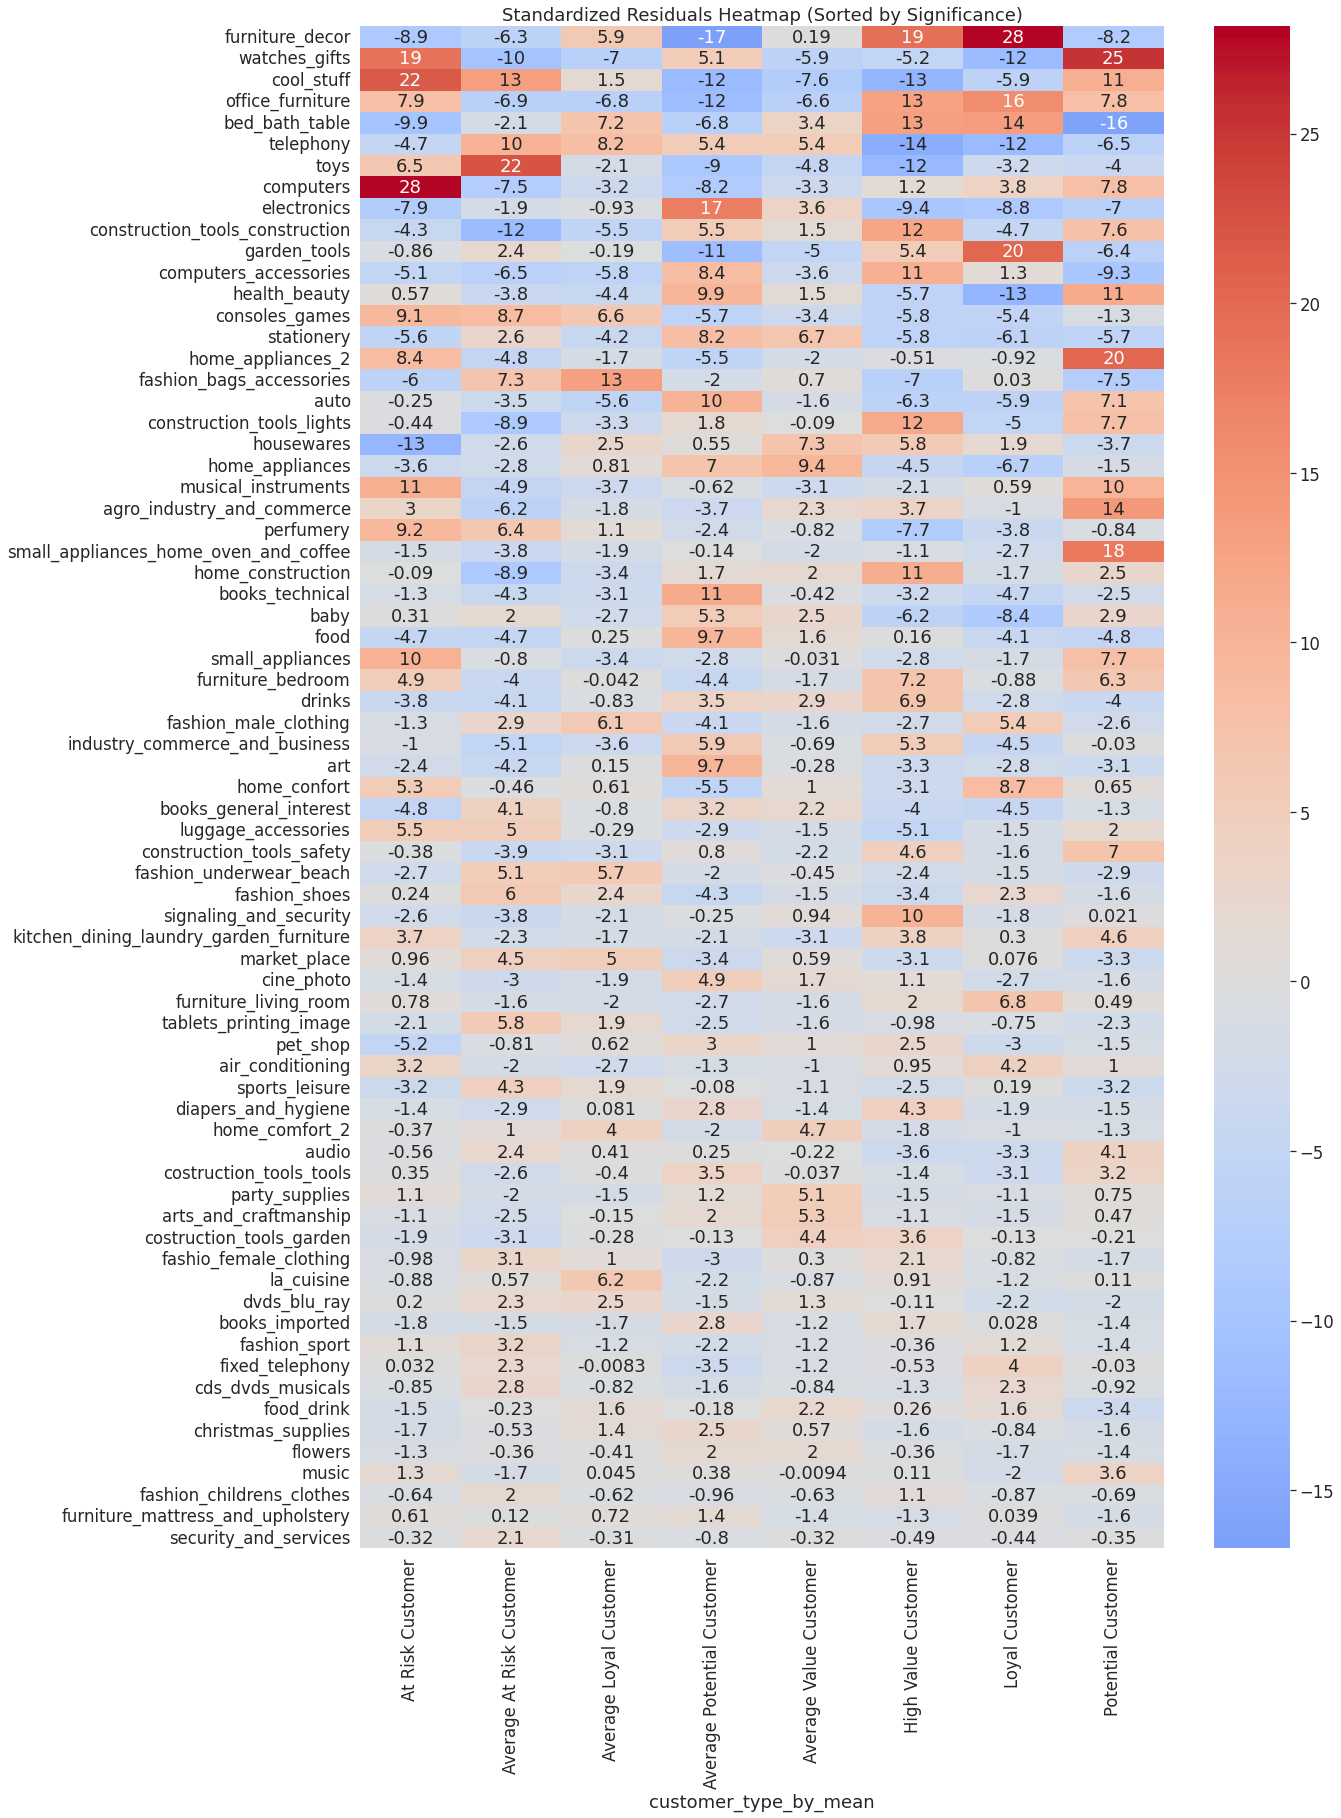

In [11]:
# 创建列联表
contingency_table = customer_product_type.set_index('customer_type_by_mean').T

# 进行卡方检验
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test Results")
print("-----------------------")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# 计算标准化残差
observed = contingency_table.values
standardized_residuals = (observed - expected) / np.sqrt(expected)

# 创建标准化残差的数据框
standardized_residuals_df = pd.DataFrame(standardized_residuals, index=contingency_table.index, columns=contingency_table.columns)

# 计算绝对值，并按绝对值总和排序
absolute_standardized_residuals = np.abs(standardized_residuals_df)
sorted_products = absolute_standardized_residuals.sum(axis=1).sort_values(ascending=False).index

# 按排序后的顺序重排标准化残差数据框
sorted_standardized_residuals_df = standardized_residuals_df.loc[sorted_products]

# 绘制热图
plt.figure(figsize=(18, 28))
sns.heatmap(sorted_standardized_residuals_df, annot=True, cmap='coolwarm', center=0, cbar=True)
plt.title('Standardized Residuals Heatmap (Sorted by Significance)')
plt.show()

In [12]:
customer_payment_type = merged_data.pivot_table(index='customer_unique_id', 
                                                columns='payment_type', 
                                                aggfunc='size', 
                                                fill_value=0).reset_index()
customer_payment_type = rfm.merge(customer_payment_type, on=['customer_unique_id']).groupby(['customer_type_by_mean']).sum().reset_index()
customer_payment_type = customer_payment_type.drop(customer_payment_type.columns[1:16], axis=1)
customer_payment_type

<ipython-input-12-7a203cf8d733>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_payment_type = rfm.merge(customer_payment_type, on=['customer_unique_id']).groupby(['customer_type_by_mean']).sum().reset_index()


,customer_type_by_mean,boleto,credit_card,debit_card,voucher
0,At Risk Customer,980,4933,29,24
1,Average At Risk Customer,6804,22334,334,431
2,Average Loyal Customer,600,3063,34,1903
3,Average Potential Customer,7455,27899,795,430
4,Average Value Customer,676,3401,72,1670
5,High Value Customer,2677,10102,192,781
6,Loyal Customer,2339,7763,67,892
7,Potential Customer,979,5783,136,31


Chi-Square Test Results
-----------------------
Chi2: 19052.325991050555
P-value: 0.0
Degrees of Freedom: 21


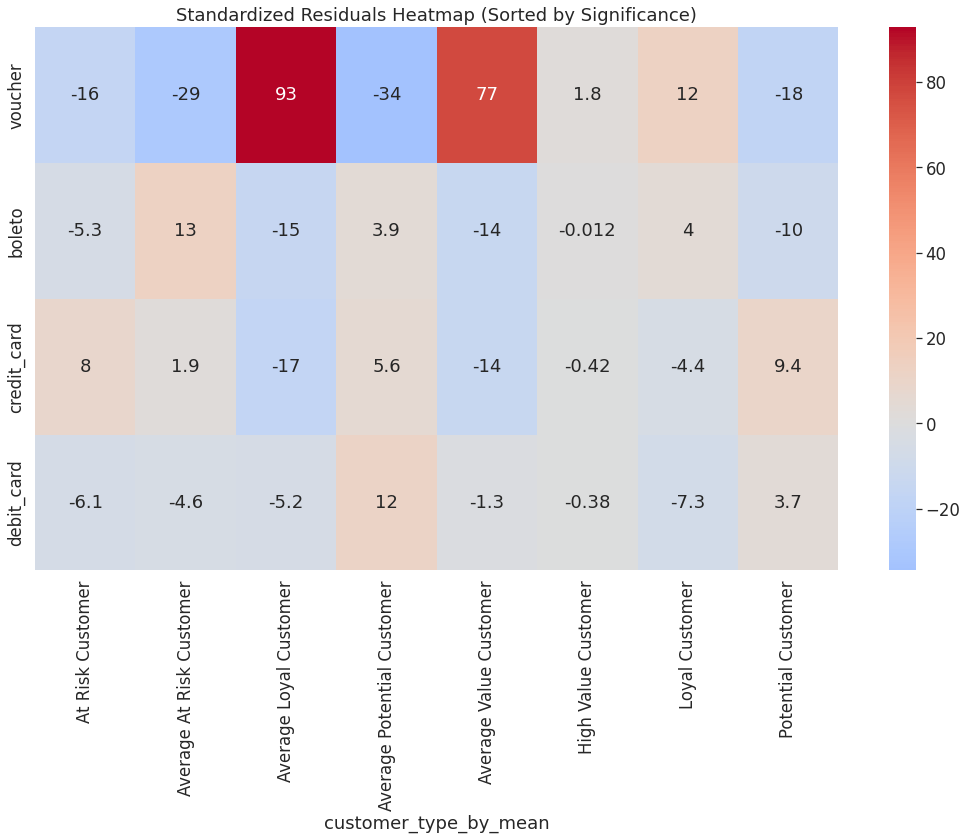

In [13]:
# 创建列联表
contingency_table = customer_payment_type.set_index('customer_type_by_mean').T

# 进行卡方检验
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test Results")
print("-----------------------")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# 计算标准化残差
observed = contingency_table.values
standardized_residuals = (observed - expected) / np.sqrt(expected)

# 创建标准化残差的数据框
standardized_residuals_df = pd.DataFrame(standardized_residuals, index=contingency_table.index, columns=contingency_table.columns)

# 计算绝对值，并按绝对值总和排序
absolute_standardized_residuals = np.abs(standardized_residuals_df)
sorted_payments = absolute_standardized_residuals.sum(axis=1).sort_values(ascending=False).index

# 按排序后的顺序重排标准化残差数据框
sorted_standardized_residuals_df = standardized_residuals_df.loc[sorted_payments]

# 绘制热图
plt.figure(figsize=(18, 10))
sns.heatmap(sorted_standardized_residuals_df, annot=True, cmap='coolwarm', center=0, cbar=True)
plt.title('Standardized Residuals Heatmap (Sorted by Significance)')
plt.show()

In [14]:
customer_state_type = merged_data.pivot_table(index='customer_unique_id', 
                                                columns='customer_state', 
                                                aggfunc='size', 
                                                fill_value=0).reset_index()
customer_state_type = rfm.merge(customer_state_type, on=['customer_unique_id']).groupby(['customer_type_by_mean']).sum().reset_index()
customer_state_type = customer_state_type.drop(customer_state_type.columns[1:16], axis=1)
customer_state_type

<ipython-input-14-c5cbdf701d15>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_state_type = rfm.merge(customer_state_type, on=['customer_unique_id']).groupby(['customer_type_by_mean']).sum().reset_index()


,customer_type_by_mean,AC,AL,AM,AP,BA,CE,DF,ES,GO,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,At Risk Customer,16,51,11,9,249,147,123,127,150,...,264,871,44,29,3,377,234,40,1960,30
1,Average At Risk Customer,25,121,50,13,999,414,612,649,604,...,1543,4046,150,85,15,1780,1156,123,12076,75
2,Average Loyal Customer,2,11,8,4,243,57,86,99,113,...,286,737,30,14,0,284,181,11,2469,20
3,Average Potential Customer,14,121,50,24,1152,419,824,750,681,...,1864,4325,142,51,11,1836,1234,97,16761,92
4,Average Value Customer,4,10,8,2,203,46,114,91,111,...,281,769,25,10,0,241,158,8,2932,4
5,High Value Customer,8,37,17,6,395,163,263,219,301,...,736,1827,45,22,9,834,579,36,5910,55
6,Loyal Customer,15,52,11,17,404,137,259,232,248,...,551,1588,61,33,4,675,402,43,4236,25
7,Potential Customer,9,52,13,8,297,144,168,133,151,...,354,824,63,35,8,386,274,35,2453,32


Chi-Square Test Results
-----------------------
Chi2: 1870.8200069976372
P-value: 1.0440525613620148e-277
Degrees of Freedom: 182


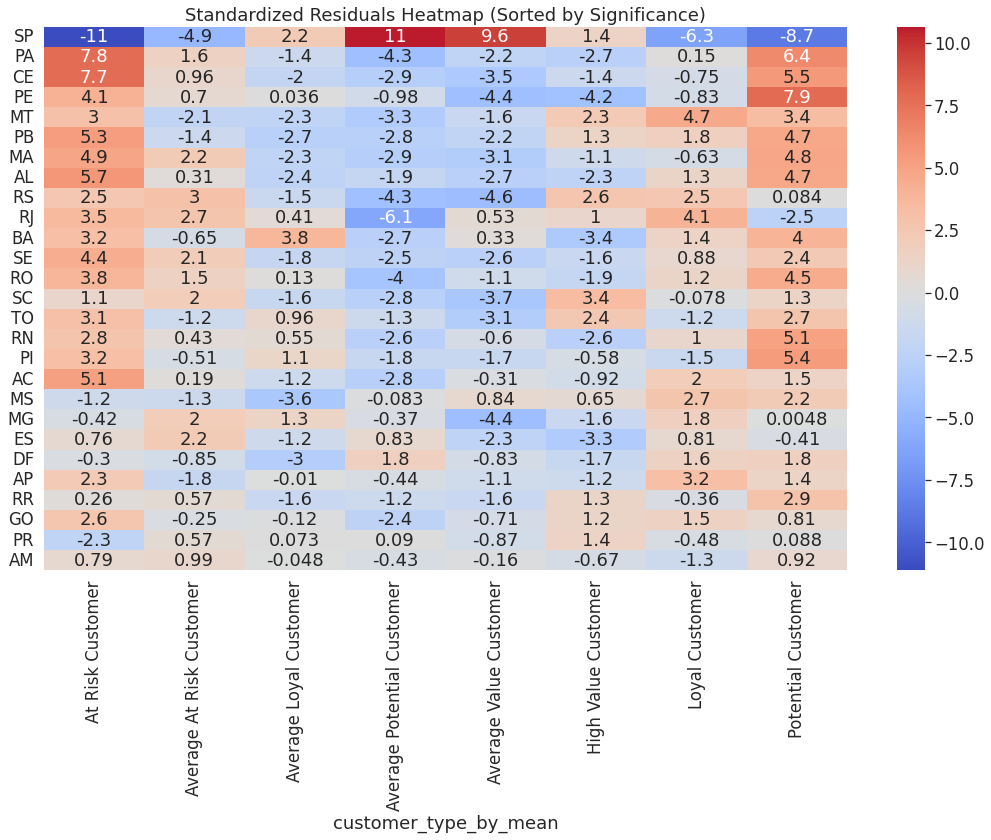

In [15]:
# 创建列联表
contingency_table = customer_state_type.set_index('customer_type_by_mean').T

# 进行卡方检验
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test Results")
print("-----------------------")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# 计算标准化残差
observed = contingency_table.values
standardized_residuals = (observed - expected) / np.sqrt(expected)

# 创建标准化残差的数据框
standardized_residuals_df = pd.DataFrame(standardized_residuals, index=contingency_table.index, columns=contingency_table.columns)

# 计算绝对值，并按绝对值总和排序
absolute_standardized_residuals = np.abs(standardized_residuals_df)
sorted_states = absolute_standardized_residuals.sum(axis=1).sort_values(ascending=False).index

# 按排序后的顺序重排标准化残差数据框
sorted_standardized_residuals_df = standardized_residuals_df.loc[sorted_states]

# 绘制热图
plt.figure(figsize=(18, 10))
sns.heatmap(sorted_standardized_residuals_df, annot=True, cmap='coolwarm', center=0, cbar=True)
plt.title('Standardized Residuals Heatmap (Sorted by Significance)')
plt.show()